<!--NOTEBOOK_HEADER-->
*This notebook contains material from [chemeng316_fluids](https://docNathanM.github.io/chemeng316_fluids);
content is available [on Github](https://github.com/docNathanM/chemeng316_fluids).*


<!--NAVIGATION-->
< [A.0 Simulating Fluid Mechanics](https://docNathanM.github.io/chemeng316_fluids/A.00-Simulating-Fluid-Mechanics.html) | [Contents](toc.html) | [B.0 Homework Assignments](https://docNathanM.github.io/chemeng316_fluids/B.00-Homework-Assignments.html) ><p><a href="https://colab.research.google.com/github/docNathanM/chemeng316_fluids/blob/master/docs/A.01-Fluid-Simulation-with-PhiFlow.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://docNathanM.github.io/chemeng316_fluids/A.01-Fluid-Simulation-with-PhiFlow.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# A.1 Fluid Simulation with $\phi_\textrm{Flow}$

The website https://tum-pbs.github.io/PhiFlow/ at the GitHub repository https://github.com/tum-pbs/PhiFlow.

This take the cake in my view. I was able to very quickly get a working 2D simulation of a bouyant plume running in just a few lines of code. Thanks to the developers for the YouTube tutorials and lessons at https://youtube.com/playlist?list=PLYLhRkuWBmZ5R6hYzusA2JBIUPFEE755O&si=G1gEN_6u_Bfkwp_6

In [1]:
!pip install --quiet phiflow

In [2]:
from phi.torch import flow

In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
from IPython import display
from time import sleep

In [5]:
N_TIME_STEPS = 150

In [6]:
velocity = flow.StaggeredGrid(
    values = (0.0, 0.0),
    extrapolation = 0.0,
    x = 64,
    y = 64,
    bounds = flow.Box(x=100,y=100)
)

In [7]:
smoke = flow.CenteredGrid(
    values = 0.0,
    extrapolation=flow.extrapolation.BOUNDARY,
    x=200,
    y=200,
    bounds = flow.Box(x=100,y=100)
)

In [9]:
inflow = 0.2 * flow.resample(
        flow.Sphere(
            x=50,
            y=9.5,
            radius=5,
        ),
    to=smoke,
    soft=True
)

In [10]:
@flow.math.jit_compile #Only for PyTorch ... I don't have that installed for now.
def step(velocity_prev,smoke_prev,dt=1.0):
    smoke_next = flow.advect.mac_cormack(smoke_prev,velocity_prev,dt) + inflow
    bouyancy_force = smoke_next * (0.0, 0.1) @ velocity
    velocity_tent = flow.advect.semi_lagrangian(velocity_prev,velocity_prev,dt) + bouyancy_force * dt
    velocity_next, pressure = flow.fluid.make_incompressible(velocity_tent)
    return velocity_next, smoke_next

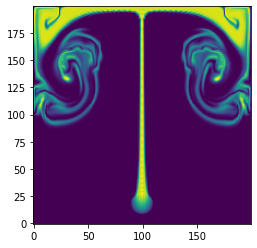

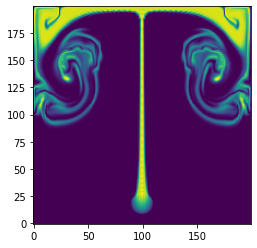

In [11]:
for _ in range(N_TIME_STEPS):
    velocity, smoke = step(velocity, smoke)
    smoke_values_extracted = smoke.values.numpy("y,x")
    plt.imshow(smoke_values_extracted,origin="lower")
    display.clear_output(wait=True)
    display.display(plt.gcf())
    sleep(0.1)

<!--NAVIGATION-->
< [A.0 Simulating Fluid Mechanics](https://docNathanM.github.io/chemeng316_fluids/A.00-Simulating-Fluid-Mechanics.html) | [Contents](toc.html) | [B.0 Homework Assignments](https://docNathanM.github.io/chemeng316_fluids/B.00-Homework-Assignments.html) ><p><a href="https://colab.research.google.com/github/docNathanM/chemeng316_fluids/blob/master/docs/A.01-Fluid-Simulation-with-PhiFlow.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://docNathanM.github.io/chemeng316_fluids/A.01-Fluid-Simulation-with-PhiFlow.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>